In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
nba = pd.read_csv('nba_2013.csv')
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [5]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:

## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in nba.columns if nba[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(nba[feature].isnull().mean(), 4),  ' % missing values')

fg. 0.0042  % missing values
x3p. 0.1393  % missing values
x2p. 0.0062  % missing values
efg. 0.0042  % missing values
ft. 0.0416  % missing values


In [8]:
## Replacing the numerical Missing Values

for feature in features_with_na:
    ## We will replace by using median since there are outliers
    median_value=nba[feature].median()
    
    ## create a new feature to capture nan values
    
    nba[feature].fillna(median_value,inplace=True)
    
nba[features_with_na].isnull().sum()

fg.     0
x3p.    0
x2p.    0
efg.    0
ft.     0
dtype: int64

In [9]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [15]:
categorical_features=[feature for feature in nba.columns if nba[feature].dtypes=='O']
categorical_features

['player', 'pos', 'bref_team_id', 'season']

In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(nba[feature].unique())))

The feature is player and number of categories are 481
The feature is pos and number of categories are 7
The feature is bref_team_id and number of categories are 31
The feature is season and number of categories are 1


In [19]:

# list of numerical variables
numerical_features = [feature for feature in nba.columns if nba[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
nba[numerical_features].head()

Number of numerical variables:  27


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,72,144,216,28,23,26,30,122,171,2013
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,142,190,332,43,40,57,71,203,265,2013
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,102,204,306,38,24,36,39,108,362,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,94,183,277,40,23,46,63,187,328,2013


In [21]:
discrete_feature=[feature for feature in numerical_features if len(nba[feature].unique())<25 and feature not in nba['season_end']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [22]:
discrete_feature

['age', 'season_end']

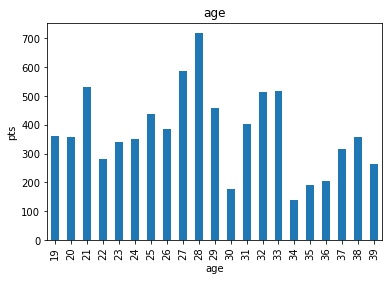

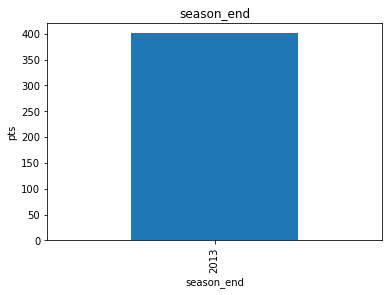

In [25]:
for feature in discrete_feature:
    data=nba.copy()
    data.groupby(feature)['pts'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('pts')
    plt.title(feature)
    plt.show()

In [27]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 25


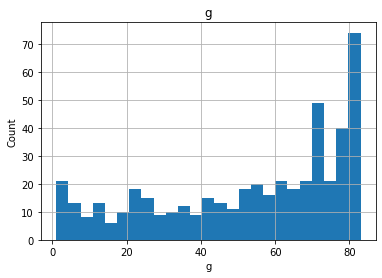

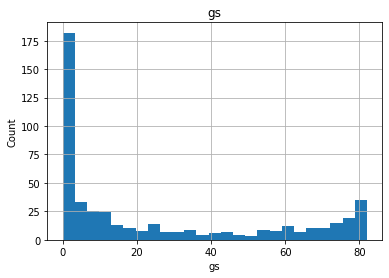

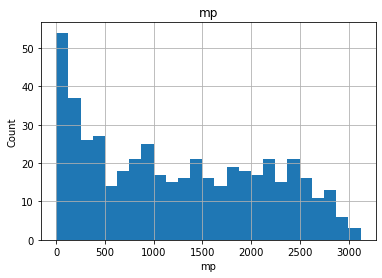

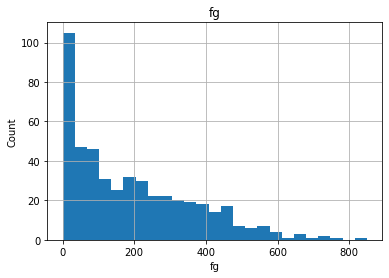

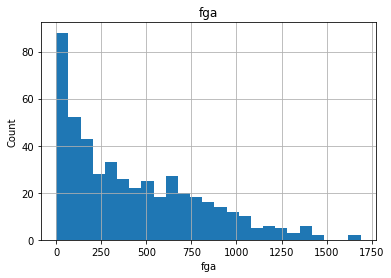

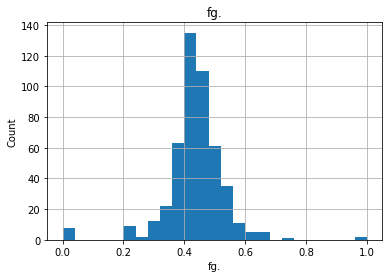

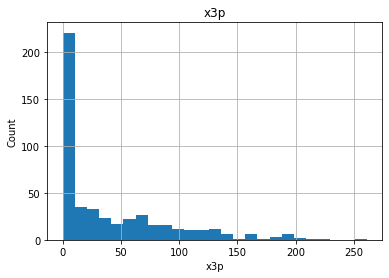

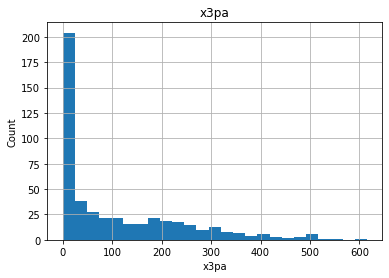

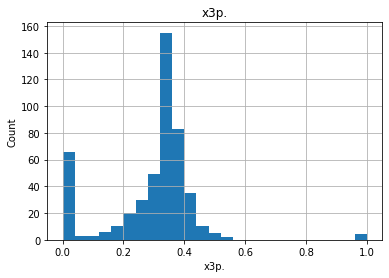

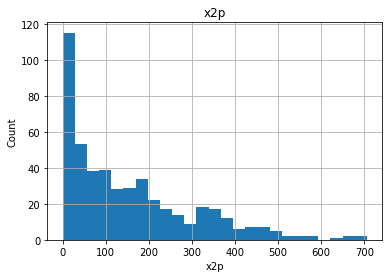

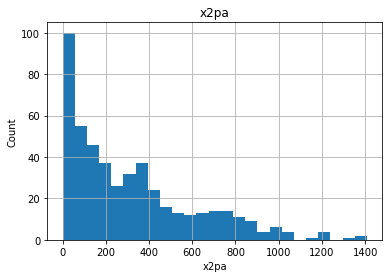

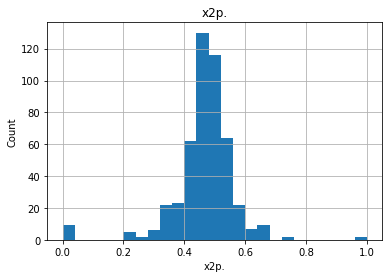

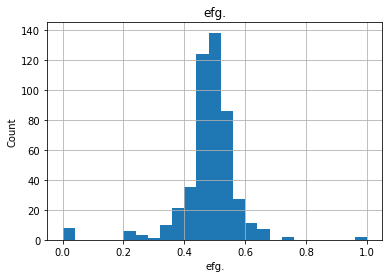

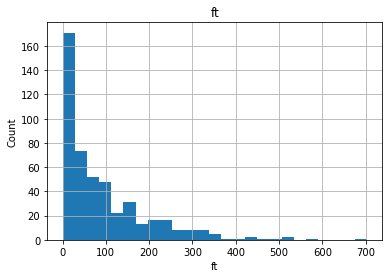

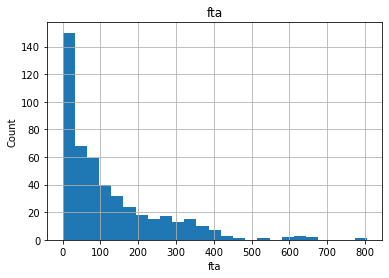

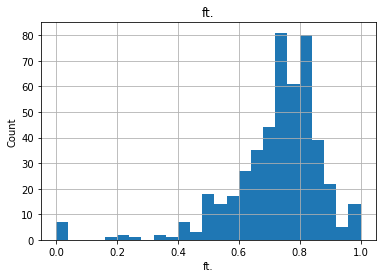

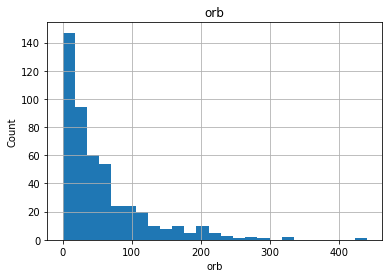

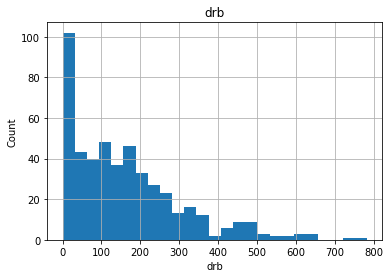

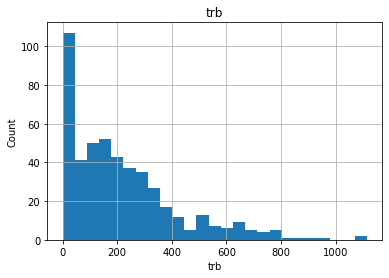

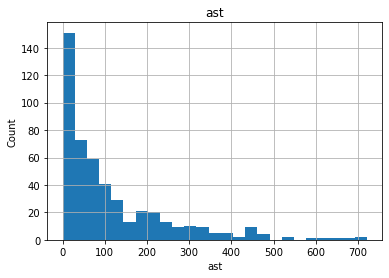

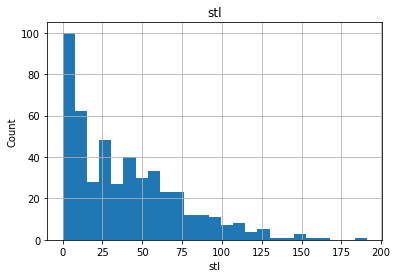

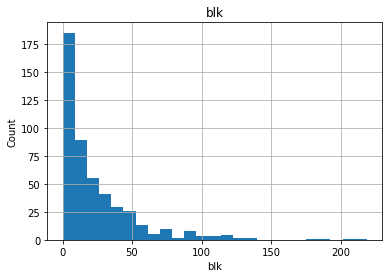

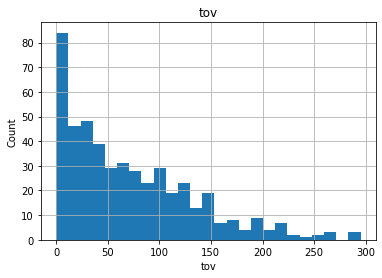

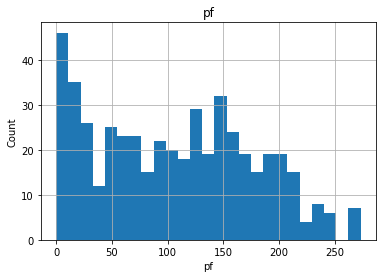

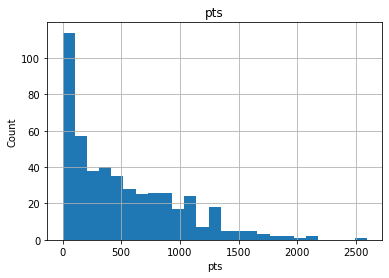

In [28]:

## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=nba.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(nba[numerical_features].drop(['pts','season_end'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
scaled_features = scaler.transform(nba[numerical_features].drop(['pts','season_end'],axis=1))

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,nba['pts'],
                                                    test_size=0.30)

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [48]:
print("Coefficient of determination R^2 <-- on train set: {}".format(knn.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [49]:
print("Coefficient of determination R^2 <-- on test set: {}".format(knn.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9297158872609741


In [52]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,scaled_features,nba['pts'],cv=5)

In [53]:
score.mean()

0.9363982185546218

### model evaluation

In [54]:
prediction=knn.predict(X_test)

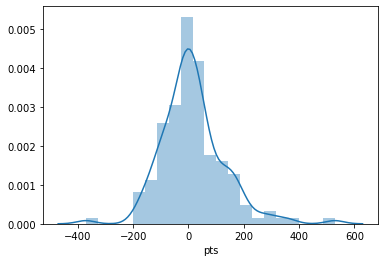

In [55]:
sns.distplot(y_test-prediction)

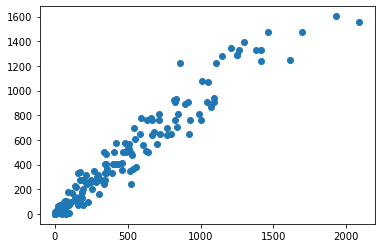

In [56]:
plt.scatter(y_test,prediction)

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 81.82068965517242
MSE: 13410.289655172413
RMSE: 115.80280504017341


## Hyperparameter tunning

In [57]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,scaled_features,nba['pts'],cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

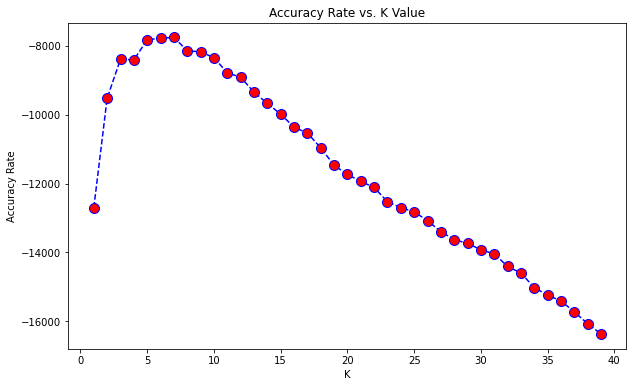

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [60]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn1 = KNeighborsRegressor(n_neighbors=7)

knn1.fit(X_train,y_train)
predictions = knn1.predict(X_test)

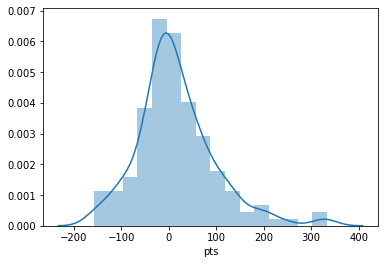

In [61]:
sns.distplot(y_test-predictions)

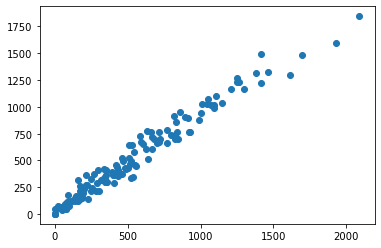

In [62]:
plt.scatter(y_test,predictions)

In [63]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 59.51034482758621
MSE: 7079.47881773399
RMSE: 84.13963880201763
